[![GitHub issues by-label](https://img.shields.io/github/issues-raw/pfebrer/sisl/WavefunctionPlot?style=for-the-badge)](https://github.com/pfebrer/sisl/labels/WavefunctionPlot)

WavefunctionPlot
=========

The `WavefunctionPlot` class will help you very easily generate and display wavefunctions from a `Hamiltonian` or any other source. If you already have your wavefunction in a grid, you can use `GridPlot`.  

<div class="alert alert-info">
    
Note
    
`WavefunctionPlot` is just an extension of `GridPlot`, so everything in [the GridPlot notebook](./GridPlot.html) applies and this notebook **will only display the additional features**.

</div>

In [1]:
import sisl
import sisl.viz

## Generating wavefunctions from a hamiltonian

We will create a toy graphene tight binding hamiltonian, but you could have read the `Hamiltonian` from any source. Note that your hamiltonian **needs to contain the corresponding geometry with the right orbitals**, otherwise we have no idea what's the shape of the wavefunction.

In [2]:
import numpy as np

r = np.linspace(0, 3.5, 50)
f = np.exp(-r)

orb = sisl.AtomicOrbital('2pzZ', (r, f))
geom = sisl.geom.graphene(orthogonal=True, atoms=sisl.Atom(6, orb))
geom = geom.move([0, 0, 5])
H = sisl.Hamiltonian(geom)
H.construct([(0.1, 1.44), (0, -2.7)], )

Now that we have our hamiltonian, plotting a wavefunction is as simple as: 

In [3]:
H.plot.wavefunction()

FigureWidget({
    'data': [{'i': array([  2,   2,   6, ..., 571, 599, 601], dtype=int32),
              'j': …

That truly is an ugly wavefunction.

## Selecting the wavefunction

By default, `WavefunctionPlot` gives you the first wavefunction at the gamma point. You can control this behavior by tuning the `i` and `k` settings.

For example, to get the second wavefunction at the gamma point:

In [4]:
plot = H.plot.wavefunction(i=2, k=(0, 0, 0))
plot

FigureWidget({
    'data': [{'i': array([  2,   3,   4, ..., 137, 140, 141], dtype=int32),
              'j': …

You can also select the spin with the `spin` setting (if you have, of course, a spin polarized `Hamiltonian`).

<div class="alert alert-info">

Note
    
If you update the **number of the wavefunction, the eigenstates are already calculated**, so there's no need to recalculate them. However, changing the **k point** or the **spin component** will trigger a **recalculation of the eigenstates**.

</div>

## Grid precision

The wavefunction is projected in a grid, and how fine that grid is will determine the resolution. You can control this with the `grid_prec` setting, which accepts the **grid precision in Angstrom**. Let's check the difference in 2D, where it will be best appreciated:

In [5]:
plot.update_settings(axes="xy", k=(0,0,0), transforms=["square"]) # by default grid_prec is 0.2 Ang

FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': 'b6d65fc1-0484-4072-968e-94aa0f68145a',
 …

In [6]:
plot.update_settings(grid_prec=0.05)

FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': '2405fa3e-fb2f-41d4-a5ca-ad118512cb5d',
 …

Much better, isn't it? Notice how it didn't look that bad in 3d, because the grid is smooth, so it's values are nicely interpolated. You can also appreciate this by setting `zsmooth` to `"best"` in 2D, which does an "OK job" at guessing the values.

In [7]:
plot.update_settings(grid_prec=0.2, zsmooth="best")

FigureWidget({
    'data': [{'type': 'heatmap',
              'uid': 'fdb6b760-b941-4361-8957-69c2231598f4',
 …

<div class="alert alert-warning">
    
Warning
    
Keep in mind that a finer grid will **occupy more memory and take more time to generate and render**, and sometimes it might be unnecessary to make your grid very fine, specially if it's smooth.
    
</div>

## GridPlot settings

As stated at the beggining of this notebook, you have all the power of `GridPlot` available to you. Therefore you can, for example, display supercells of the resulting wavefunctions (please don't tile the hamiltonian! :)).

In [8]:
plot.update_settings(axes="xyz", nsc=[2,2,1], grid_prec=0.1, transforms=[],
    isos=[
        {"val": -0.07, "opacity": 1, "color": "salmon"},
        {"val": 0.07, "opacity": 0.7, "color": "blue"}
    ],
    geom_kwargs={"atoms_style": dict(color=["orange", "red", "green", "pink"])},
)

FigureWidget({
    'data': [{'color': 'salmon',
              'i': array([   2,    2,    5, ..., 7537, 7624, 7…

We hope you enjoyed what you learned!

-----
This next cell is just to create the thumbnail for the notebook in the docs 

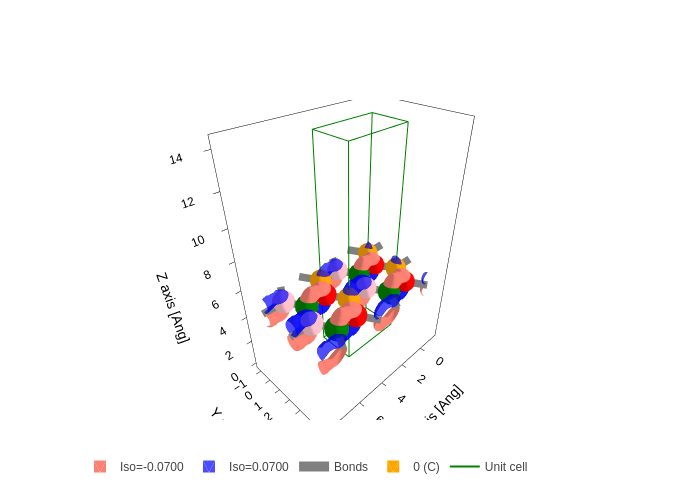

In [9]:
thumbnail_plot = plot

if thumbnail_plot:
    thumbnail_plot.show("png")

-------------